# 11. 나의 첫 번째 캐글 경진대회, 무작정 따라해보기 [프로젝트]




## 데이터 전처리

In [ ]:
# 코랩을 사용하지 않는 경우, 이 코드블럭은 지운다.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 필요한 라이브러리 가져오기
import os
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# get the current working directory
CWD = os.getcwd()
print(CWD)

# load the data
train = pd.read_csv(CWD + '/drive/MyDrive/ml/data/train.csv')
test = pd.read_csv(CWD + '/drive/MyDrive/ml/data/test.csv')
print(train.shape, test.shape)

/content
(15035, 21) (6468, 20)


In [ ]:
# 훈련 데이터 살펴보기
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [ ]:
# 결측치의 유무를 확인한다.
train.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
# train 데이터의 date 칼럼에서 년도와 날짜만 추출한다.
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [ ]:
# 타겟 칼럼인 price를 y에 담는다.
y = train['price']
del train['price'] # train에 있던 price 칼럼은 삭제한다.

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
# 불필요한 id 칼럼은 제거한다.
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
# 위 과정을 test 데이터에도 적용한다.
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
del test['id']
test.head()
print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


## 데이터 시각화  
1. 각각의 데이터를 살펴보자.
2. y값을 로그변환하여 정규 분포 모양을 갖도록 하자.

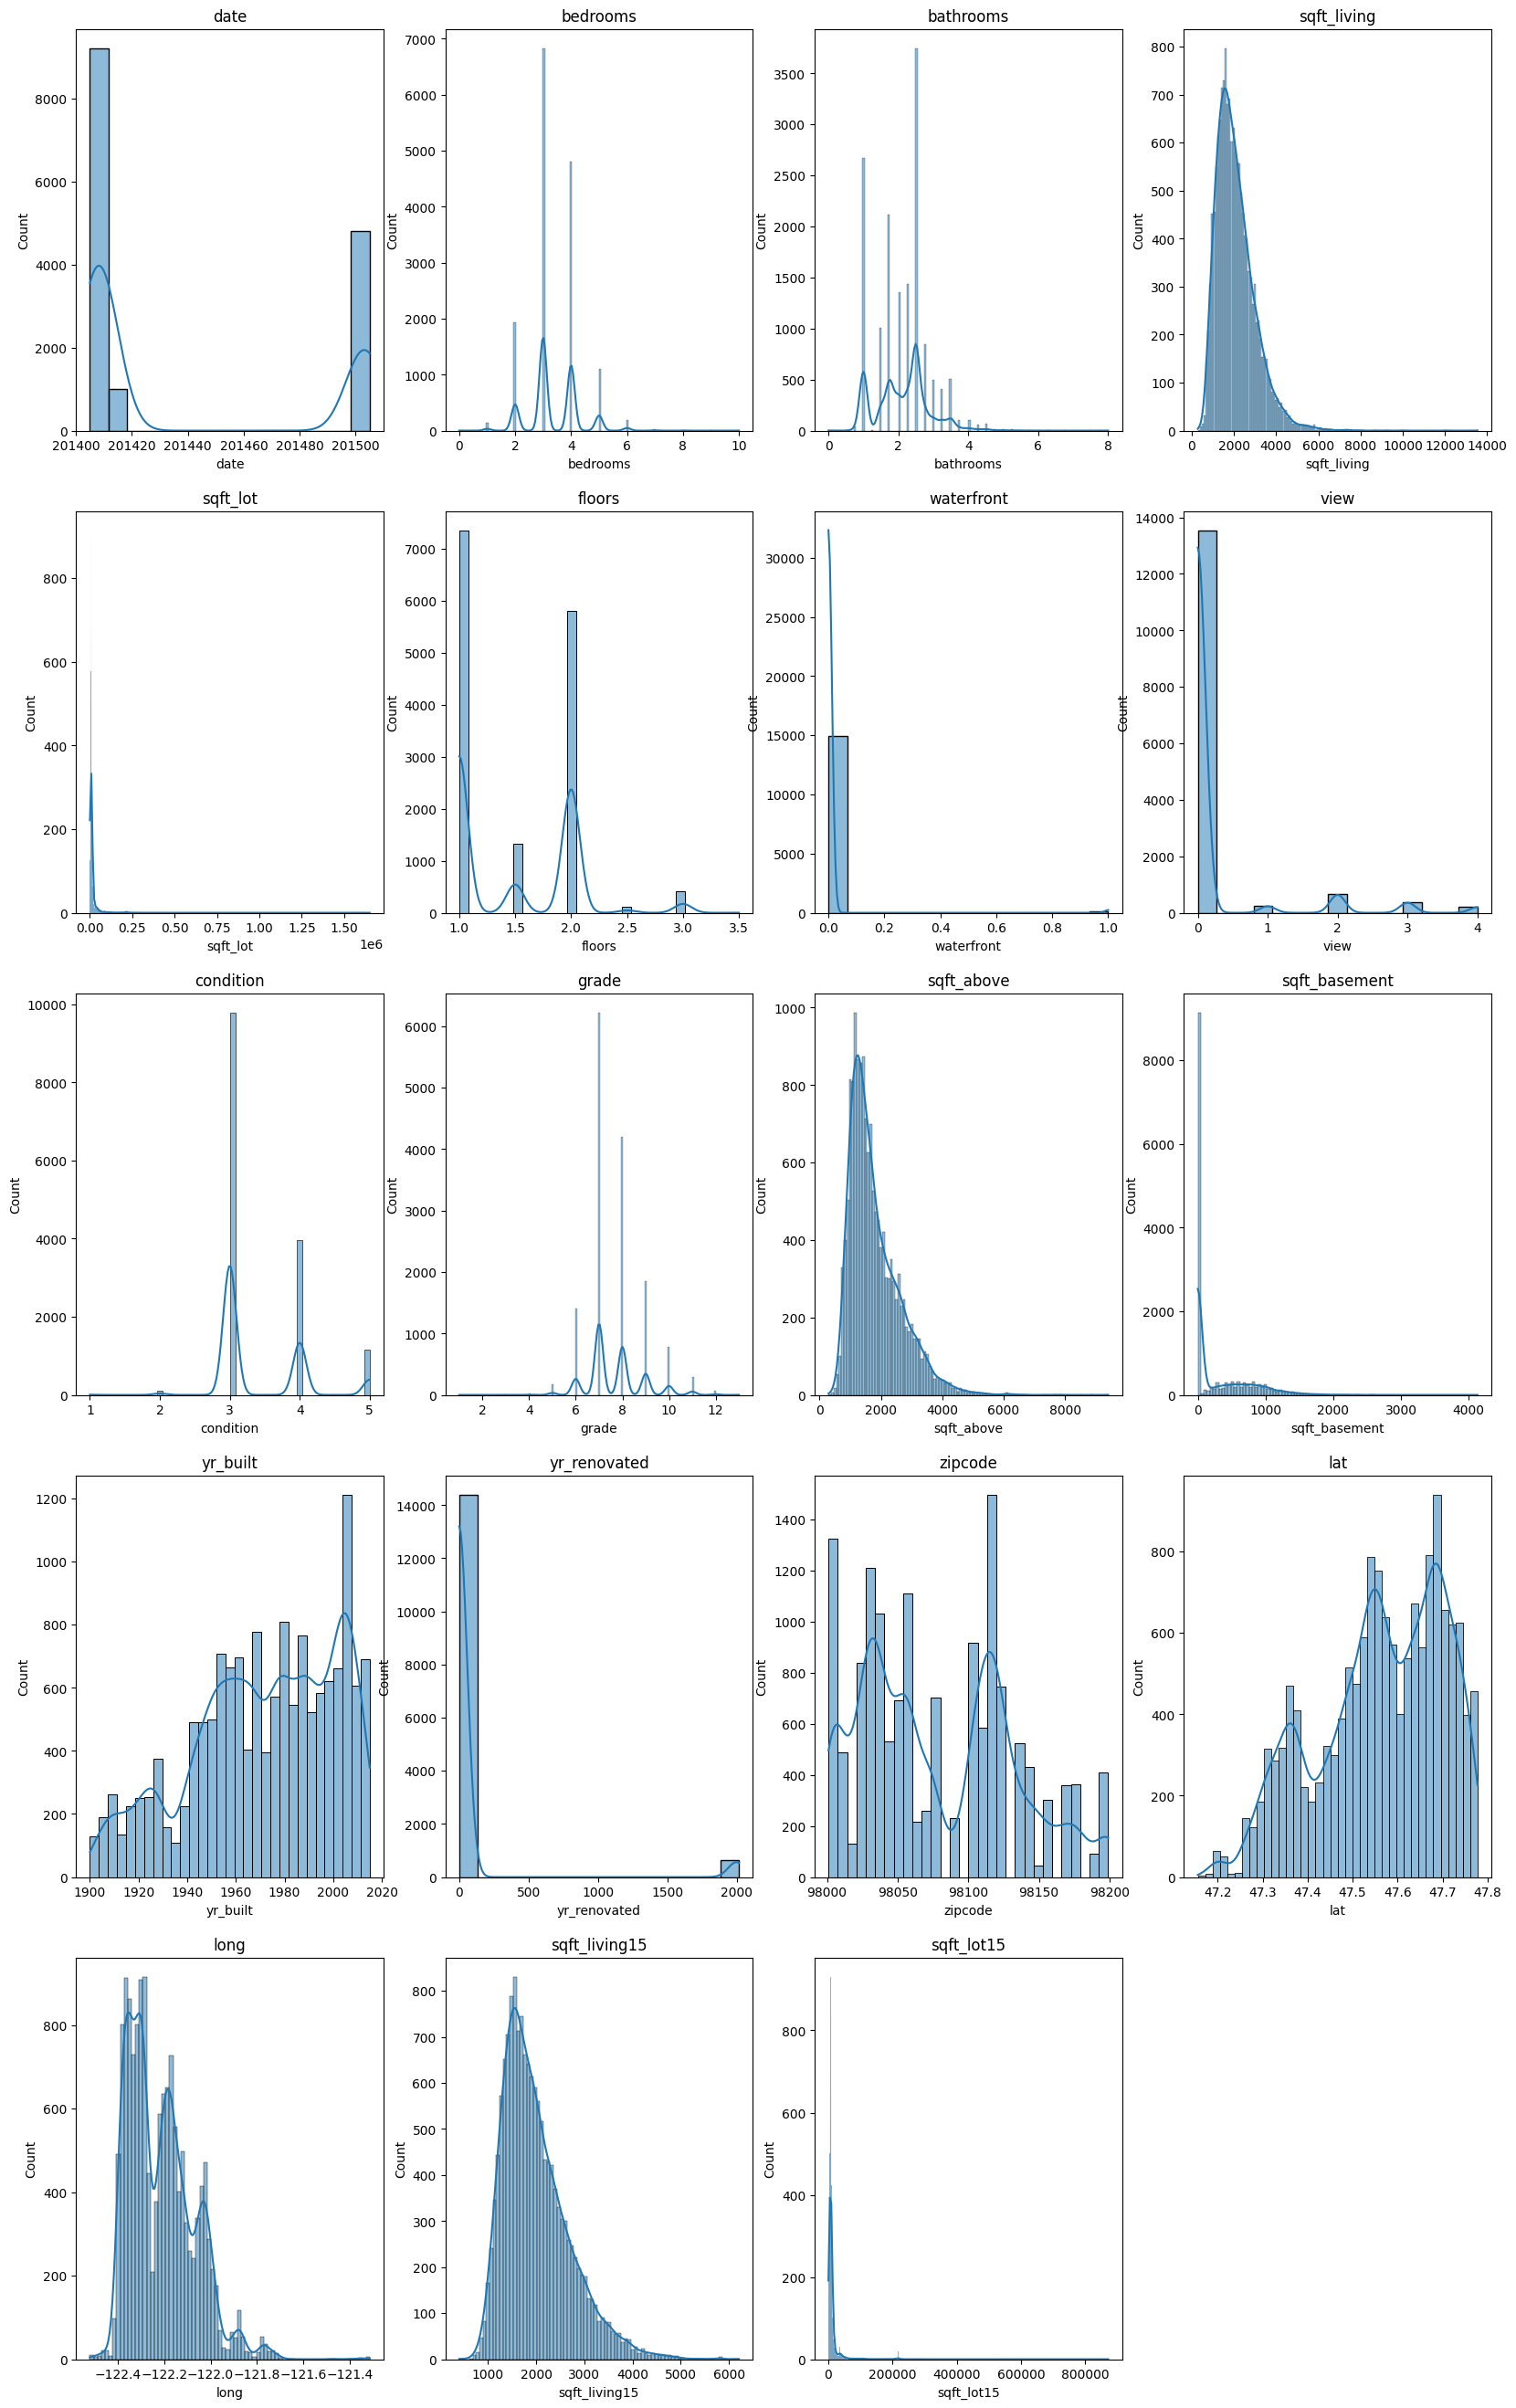

In [ ]:
# train 데이터의 각 특성별 분포 살펴보기
plt.figure(figsize=(20, 40))

columns = train.columns
for i in range(len(columns)):
    plt.subplot(6, 4, i+1)
    sns.histplot(train[columns[i]], kde=True)
    plt.title(columns[i])

In [ ]:
# y 값 살펴보기
y

,price
0,221900.0
1,180000.0
2,510000.0
3,257500.0
4,291850.0
...,...
15030,610685.0
15031,1007500.0
15032,360000.0
15033,400000.0


<Axes: >

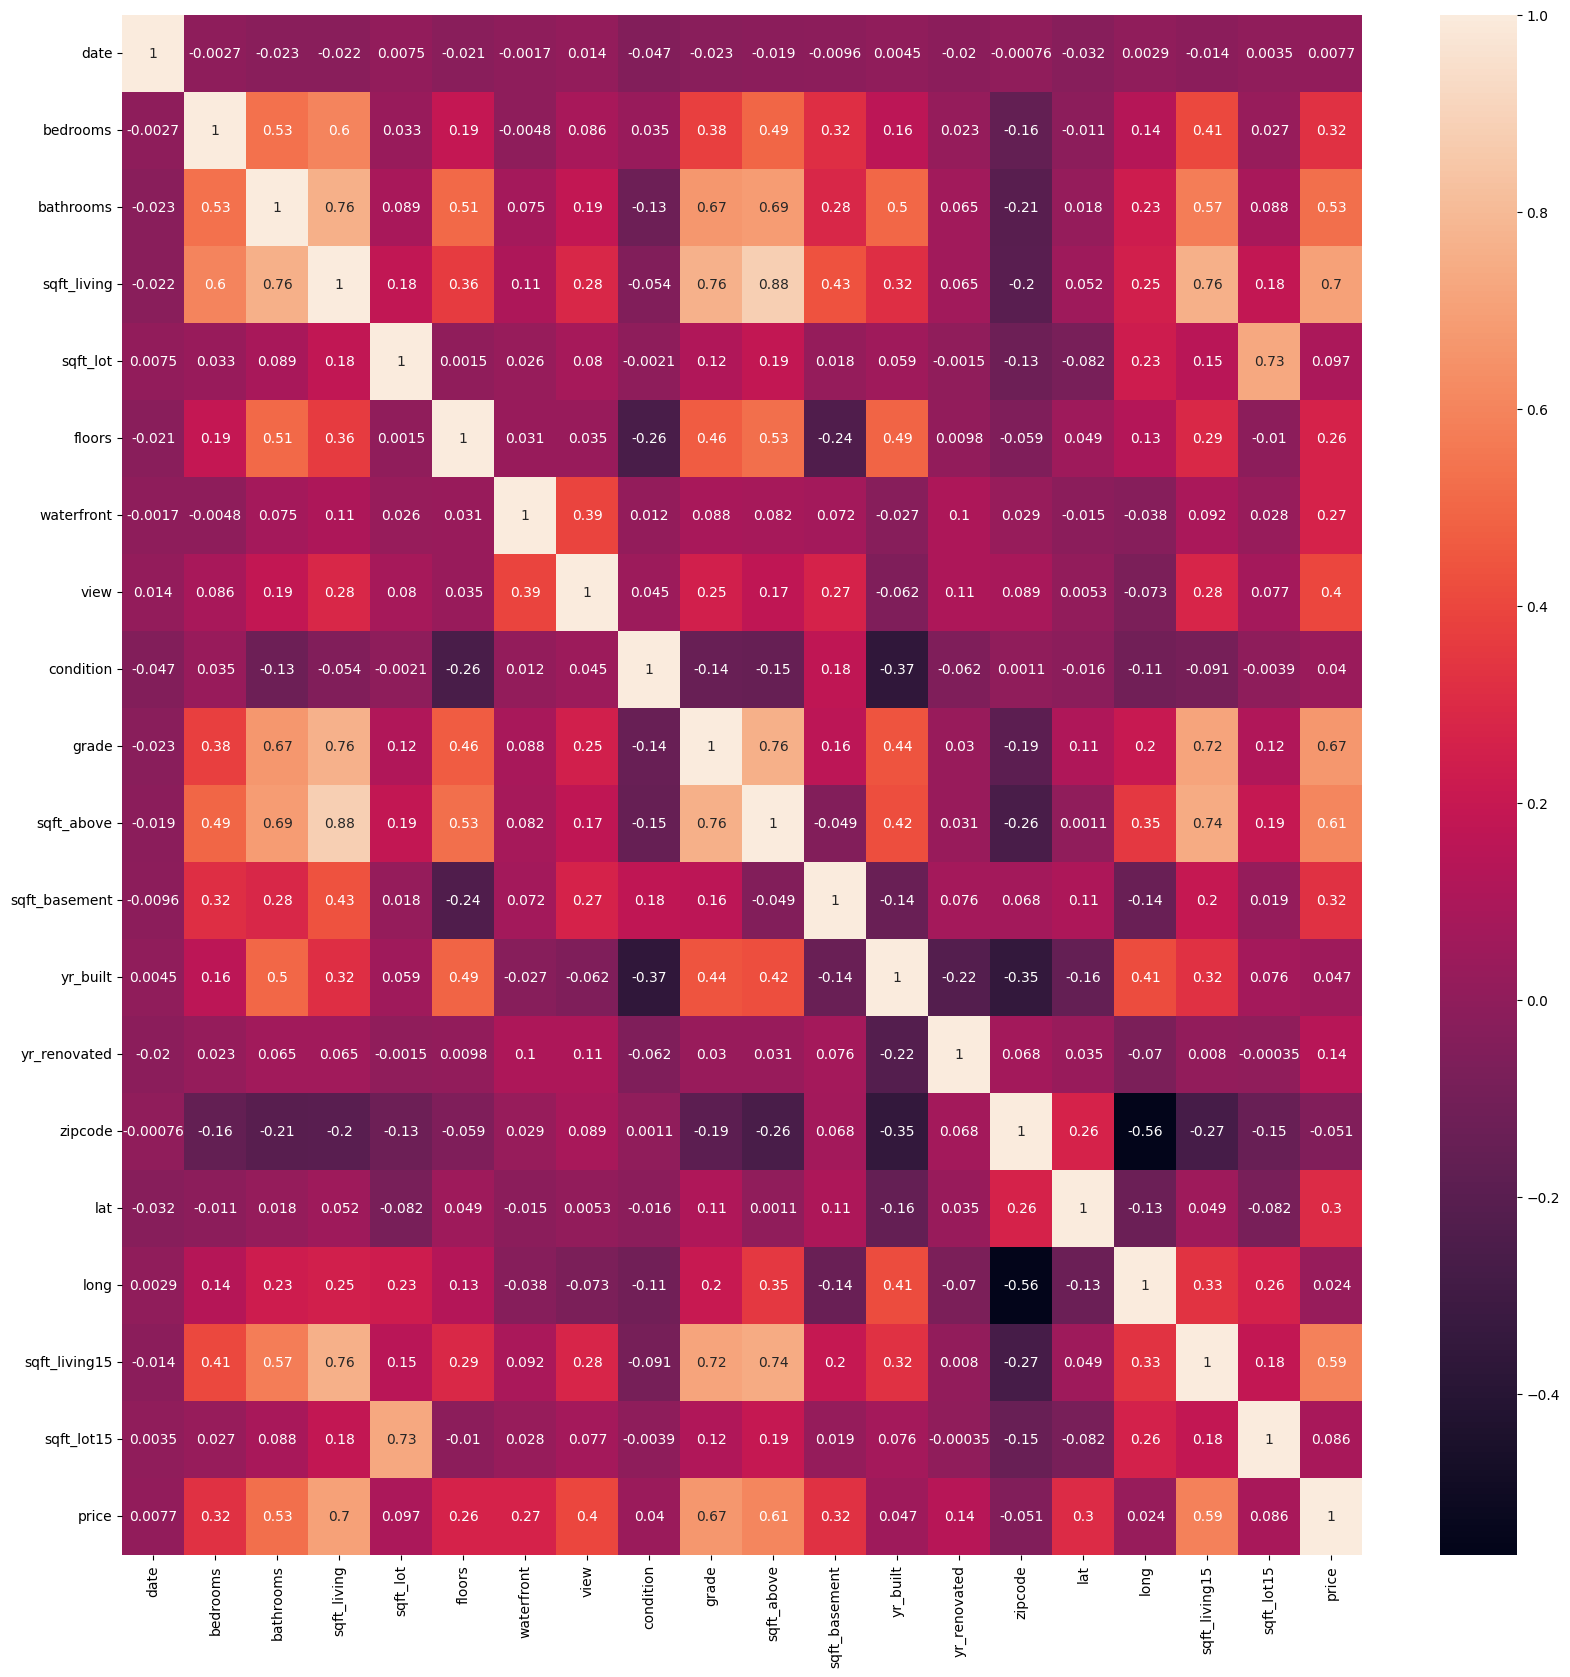

In [ ]:
# 데이터의 특성 별 상관관계 살펴보기
corr = pd.concat([train, y],axis=1).corr() # 각 특성과 price를 살펴보자.
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

<Axes: xlabel='price', ylabel='Count'>

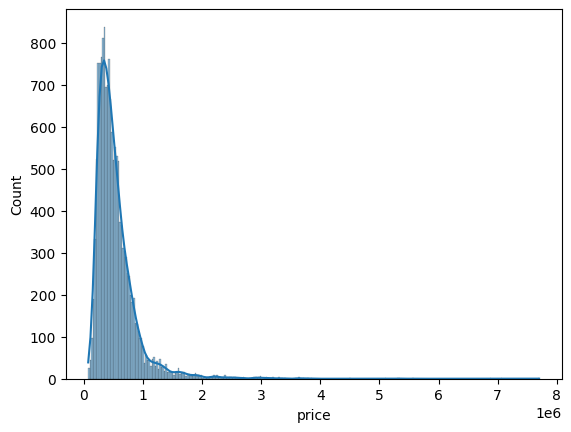

In [ ]:
# y값 분포 살펴보기
sns.histplot(y, kde=True)

In [ ]:
# log 변환을 통해 정규분포 모양을 갖도록 한다.
y = np.log1p(y)
y # y에 로그변환을 해주었기 때문에, 모델 학습 후 예측 시 exp변환을 해주어야 한다.

,price
0,12.309987
1,12.100718
2,13.142168
3,12.458779
4,12.583999
...,...
15030,13.322338
15031,13.822984
15032,12.793862
15033,12.899222


<Axes: xlabel='price', ylabel='Density'>

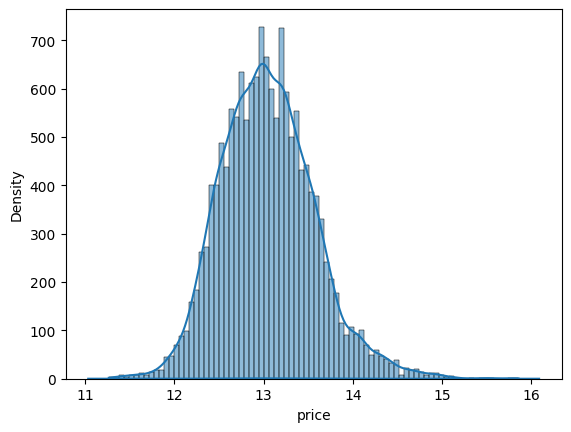

In [ ]:
# log 변환 후의 y값 분포 살펴보기
sns.kdeplot(y)
sns.histplot(y, kde=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

## 경도, 위도, zipcode 분석하기  
loss를 줄이기 위해서는 'lat', 'long', 'zipcode' 이 세 특성을 통해서 새로운 특성을 만들어야할 필요가 있다.

<Axes: xlabel='long', ylabel='lat'>

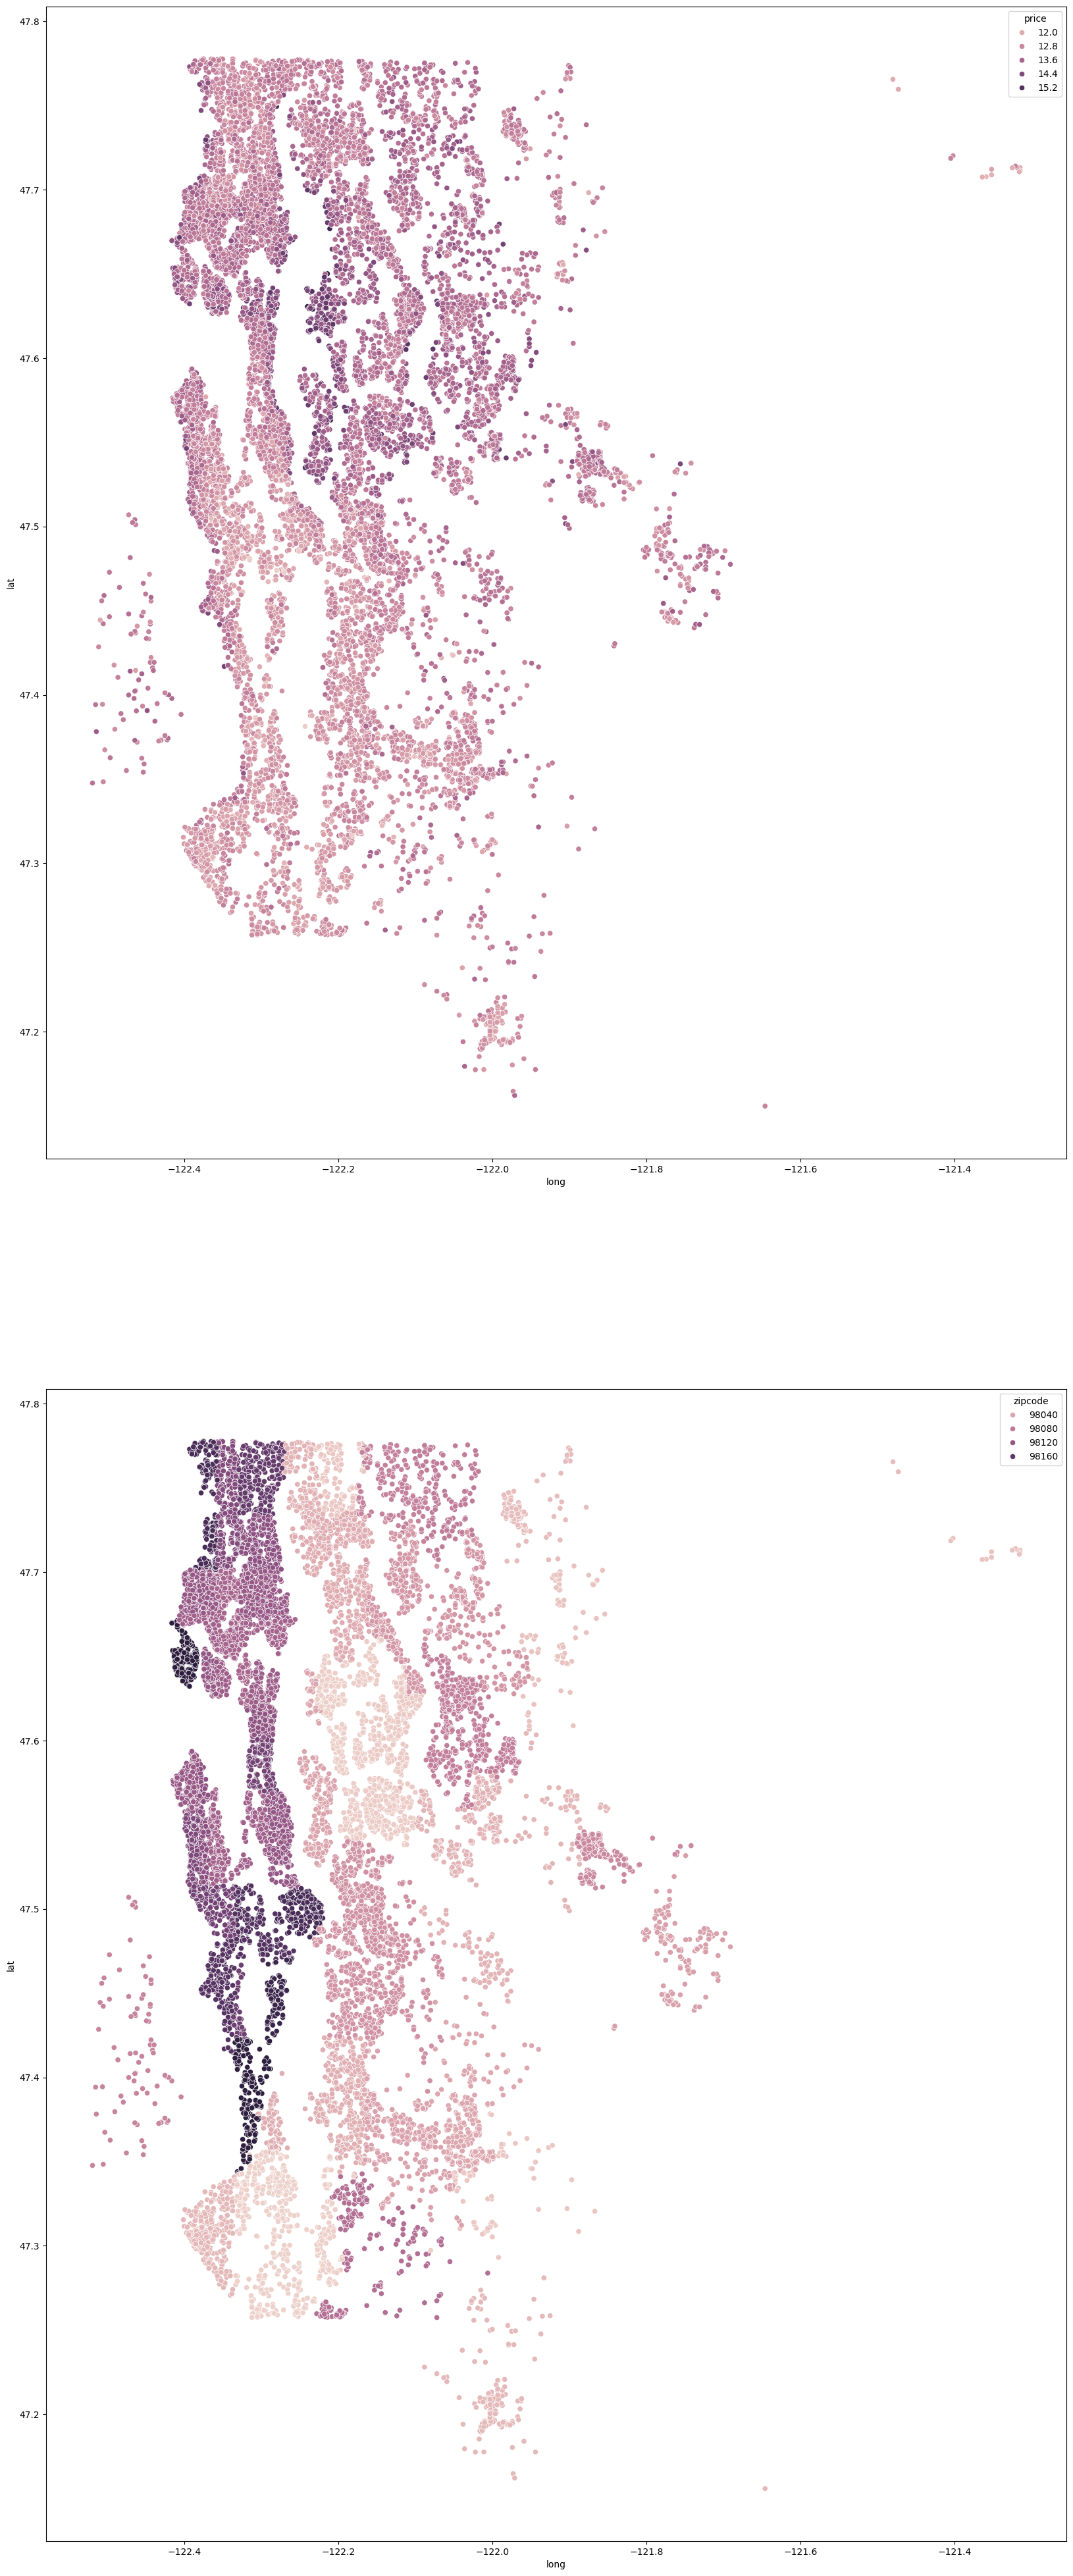

In [ ]:
train_loc_price = pd.concat([train[['lat', 'long', 'zipcode']], y], axis=1) # lat, long, zipcode, y값만 추출한다.
train_loc_price


plt.figure(figsize=(20, 50))
plt.subplot(2, 1, 1)
sns.scatterplot(data=train_loc_price, x='long', y='lat', hue='price') # 경도, 위도별 집값
plt.subplot(2, 1, 2)
sns.scatterplot(data=train_loc_price, x='long', y='lat', hue='zipcode') # 경도, 위도별 우편번호

<Axes: >

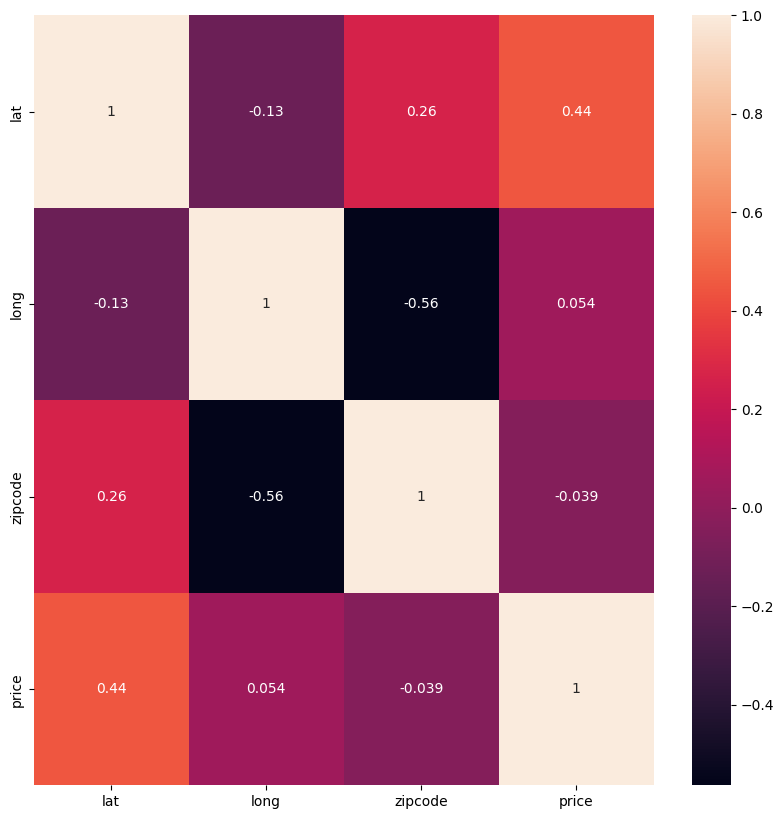

In [ ]:
# get correlations of loc_price and plot heatmap
corr = train_loc_price.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

## 도시 정보 추가하기
이 부분이 loss를 줄이는 데 나름 큰 기여를 했다.

In [ ]:
# zipcode 칼럼의 값은, 미국 WA 주의 King County지역의 zipcode임을 확인할 수 있었다.
# zipcode 값을 해당 도시 이름으로 매핑한다.
def zipcode_to_city(zipcode):
    # 우편번호별 지역 이름
    matcher = {98001: 'Auburn',
    98002: 'Auburn',
    98003: 'Federal Way',
    98004: 'Bellevue',
    98005: 'Bellevue',
    98006: 'Bellevue',
    98007: 'Bellevue',
    98008: 'Bellevue',
    98010: 'Black Diamond',
    98011: 'Bothell',
    98014: 'Carnation',
    98019: 'Duvall',
    98022: 'Enumclaw',
    98023: 'Federal Way',
    98024: 'Fall City',
    98027: 'Issaquah',
    98028: 'Kenmore',
    98029: 'Issaquah',
    98030: 'Kent',
    98031: 'Kent',
    98032: 'Kent',
    98033: 'Kirkland',
    98034: 'Kirkland',
    98038: 'Maple Valley',
    98039: 'Medina',
    98040: 'Mercer Island',
    98042: 'Kent',
    98045: 'North Bend',
    98052: 'Redmond',
    98053: 'Redmond',
    98055: 'Renton',
    98056: 'Renton',
    98058: 'Renton',
    98059: 'Renton',
    98065: 'Snoqualmie',
    98070: 'Vashon',
    98072: 'Woodinville',
    98074: 'Sammamish',
    98075: 'Sammamish',
    98077: 'Woodinville',
    98092: 'Auburn',
    98102: 'Seattle',
    98103: 'Seattle',
    98105: 'Seattle',
    98106: 'Seattle',
    98107: 'Seattle',
    98108: 'Seattle',
    98109: 'Seattle',
    98112: 'Seattle',
    98115: 'Seattle',
    98116: 'Seattle',
    98117: 'Seattle',
    98118: 'Seattle',
    98119: 'Seattle',
    98122: 'Seattle',
    98125: 'Seattle',
    98126: 'Seattle',
    98133: 'Seattle',
    98136: 'Seattle',
    98144: 'Seattle',
    98146: 'Seattle',
    98148: 'Seattle',
    98155: 'Seattle',
    98166: 'Seattle',
    98168: 'Seattle',
    98177: 'Seattle',
    98178: 'Seattle',
    98188: 'Seattle',
    98198: 'Seattle',
    98199: 'Seattle'
    }
    return matcher[zipcode]

In [ ]:
# train 데이터에 도시 칼럼을 추가한다.
train['city'] = train['zipcode'].map(zipcode_to_city)
train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Federal Way
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,201410,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,Renton
15031,201503,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,Seattle
15032,201405,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Seattle
15033,201502,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Seattle


In [ ]:
# 동일하게 test 데이터에도 도시 칼럼을 추가한다.
test['city'] = test['zipcode'].map(zipcode_to_city)
test

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,201412,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
1,201412,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
2,201405,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Redmond
3,201504,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Seattle
4,201503,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Maple Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,201406,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303,Black Diamond
6464,201501,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,Seattle
6465,201502,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,Seattle
6466,201406,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Seattle


In [ ]:
# 도시 이름은 string이기 때문에 tree 기반 모델의 원활한 학습을 위해서 카테고리화를 할 필요가 있다.
# 먼저 string을 int로 label한다. 다음으로 int를 categorical로 바꾼다.

# string을 int로 label한다.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_city_labeled = le.fit_transform(train['city'])
test_city_labeled = le.transform(test['city'])

# int label 적용하기
train['city'] = train_city_labeled
test['city'] = test_city_labeled

In [ ]:
# int를 categorical로 바꾼다.
train['city'] = train['city'].astype('category')
test['city'] = test['city'].astype('category')

# city가 카테고리가 된 것을 확인하기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           15035 non-null  int64   
 1   bedrooms       15035 non-null  int64   
 2   bathrooms      15035 non-null  float64 
 3   sqft_living    15035 non-null  int64   
 4   sqft_lot       15035 non-null  int64   
 5   floors         15035 non-null  float64 
 6   waterfront     15035 non-null  int64   
 7   view           15035 non-null  int64   
 8   condition      15035 non-null  int64   
 9   grade          15035 non-null  int64   
 10  sqft_above     15035 non-null  int64   
 11  sqft_basement  15035 non-null  int64   
 12  yr_built       15035 non-null  int64   
 13  yr_renovated   15035 non-null  int64   
 14  zipcode        15035 non-null  int64   
 15  lat            15035 non-null  float64 
 16  long           15035 non-null  float64 
 17  sqft_living15  15035 non-null  

In [ ]:
# zipcode에서 city 데이터를 얻어내었기 때문에 할 일을 다한 zipcode는 이제 삭제
del train['zipcode']
del test['zipcode']

<ipython-input-138-25e146f94d0c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t_p.groupby('city').mean()
<ipython-input-138-25e146f94d0c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(data=t_p.groupby('city').mean(), x=t_p.groupby('city').mean().index, y='price')
<ipython-input-138-25e146f94d0c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(data=t_p.groupby('city').mean(), x=t_p.groupby(

<Axes: xlabel='city', ylabel='price'>

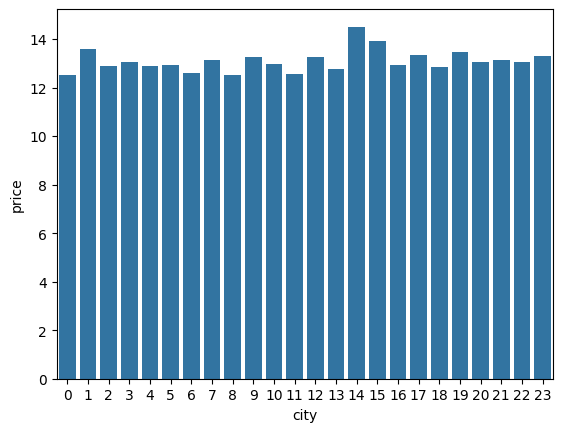

In [ ]:
# city별 집값의 추세 평균

t_p = pd.concat([train[['city']], y], axis=1)
t_p.groupby('city').mean()
sns.barplot(data=t_p.groupby('city').mean(), x=t_p.groupby('city').mean().index, y='price')

## 모델 튜닝하기   
- Lightbgm 모델과 그리드 서치 이용  
- 최적의 하이퍼파라미터를 찾아가자.


In [ ]:
# 필요한 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor


random_state=2020 # 랜덤 상태 설정


# RMSE 매트릭 함수
def rmse(y_test, y_pred):
    # 레이블인 y에 log변환을 해주었기 때문에, exp변환을 통해 본래 값으로 되돌려 놓는다.
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

# lightgbm 모델
model = LGBMRegressor(random_state=random_state)

In [ ]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    """
    1. GridSearchCV 모델로 `model`을 초기화합니다.
    2. 모델을 fitting 합니다.
    3. params, score에 각 조합에 대한 결과를 저장합니다.
    4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.
    """
    grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=verbose, n_jobs=n_jobs) # 모델 초기화
    grid_model.fit(train, y) # 모델 fitting(학습)
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    results = pd.DataFrame(params)
    results['score'] = score

    results['RMSLE'] = np.sqrt(-1 * results['score'])

    return results.sort_values(by='RMSLE')


In [ ]:
param_grid = {
    'learning_rate': [0.05],
    'max_depth': [9, 10],
    'n_estimators': [760]
}

"""
        적당히 숫자 바꿔가기
        learning_rate	max_depth	n_estimators	score	RMSLE
    	0.05	12	400	-0.025755	0.160484
    	0.05	14	400	-0.025803	0.160634
    	0.05	12	350	-0.025839	0.160747
    	0.05	10	400	-0.025856	0.160799
    	0.05	14	350	-0.025881	0.160877
    	0.08	12	400	-0.025887	0.160895
        0.08	12	350	-0.025891	0.160906
    	0.08	12	320	-0.025903	0.160945
    	0.08	10	350	-0.025905	0.160950
	    0.05	10	350	-0.025908	0.160960
    	0.08	10	400	-0.025915	0.160982

    	0.05	12	550	-0.025628	0.160086 # 이거 주목
    	0.05	12	500	-0.025667	0.160211
    	0.05	12	450	-0.025695	0.160296
    	0.05	14	550	-0.025725	0.160391
    	0.05	14	500	-0.025737	0.160428
    	0.05	12	400	-0.025755	0.160484

        0.05	12	650	-0.025594	0.159983
        0.05	12	600	-0.025619	0.160059
        0.05	12	550	-0.025628	0.160086
        0.05	10	650	-0.025742	0.160442

        0.05	12	700	-0.025579	0.159935 # 이거 주목
        0.05	12	650	-0.025594	0.159983
        0.05	12	750	-0.025595	0.159983
        0.05	10	750	-0.025729	0.160403 # 이거 주목 (성공)
        0.05	10	700	-0.025734	0.160419
        0.05	10	650	-0.025742	0.160442

        0.05	12	660	-0.025589	0.159965
        0.05	12	680	-0.025593	0.159979
        0.05	12	670	-0.025594	0.159981
        0.05	12	650	-0.025594	0.159983
        0.05	10	670	-0.025741	0.160441
        0.05	10	650	-0.025742	0.160442
        0.05	10	680	-0.025743	0.160445
        0.05	10	660	-0.025744	0.160448
        0.05	8	650	-0.025744	0.160450 # 이거 주목
        0.05	8	670	-0.025751	0.160471


    	0.05	10	760	-0.025723	0.160383 이거 주목 (성공)
    	0.05	10	750	-0.025729	0.160403
    	0.05	10	740	-0.025734	0.160417

    	0.05	10	760	-0.025723	0.160383
    	0.05	10	770	-0.025730	0.160404
    	0.05	10	780	-0.025743	0.160445
    	0.05	9	760	-0.025883	0.160881 이거 주목 (성공)


"""

model = LGBMRegressor(random_state=random_state)
gs_results = my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)
gs_results

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2291
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

,learning_rate,max_depth,n_estimators,score,RMSLE
1,0.05,10,760,-0.025723,0.160383
0,0.05,9,760,-0.025883,0.160881


In [ ]:
# 위 표를 보고 loss가 가장 낮을 때의 하이퍼파라미터를 선택하여 그 값으로 모델을 학습시킨다.
model = LGBMRegressor(learning_rate=0.05,
                      max_depth=10,
                      n_estimators=760,
                      random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2291
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

array([13.08853833, 13.14623686, 14.09241591, ..., 13.04590184,
       12.69826289, 13.01320857])

<Axes: ylabel='None'>

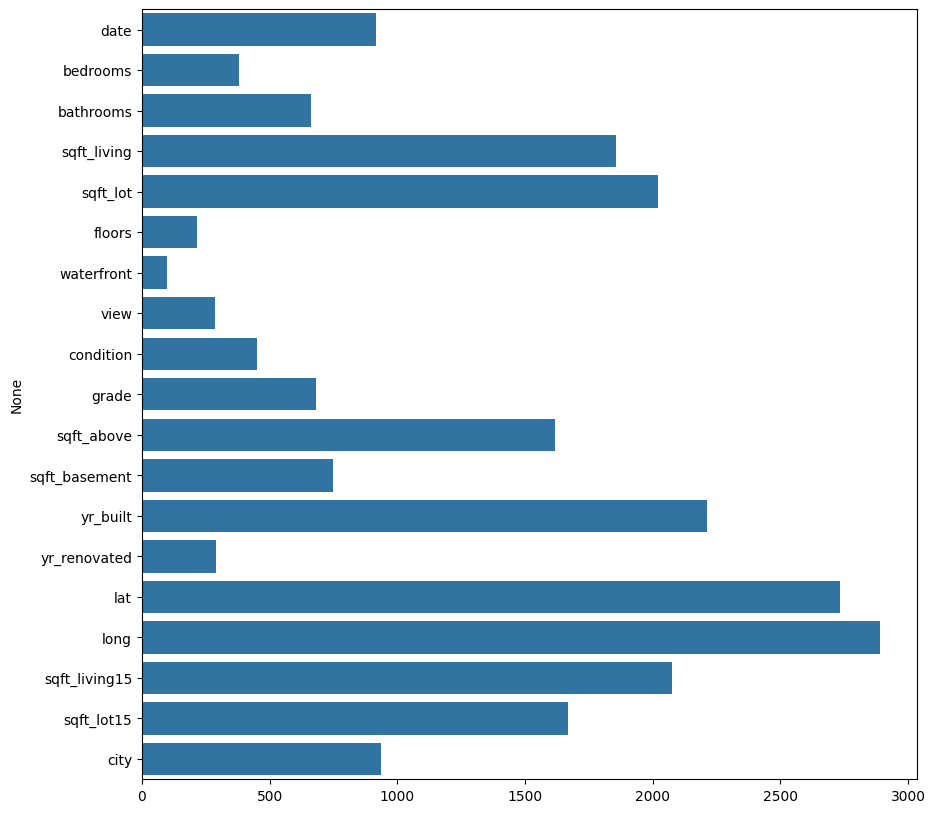

In [ ]:
# model의 feature importances를 확인해보자.
importances = model.feature_importances_

# visualise feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x=importances, y=train.columns)

In [ ]:
def save_submission(model, train, y, test, model_name, rmsle):
    """
    아래의 과정을 수행하는 `save_submission(model, train, y, test, model_name, rmsle)` 함수를 구현해 주세요.
    1. 모델을 `train`, `y`로 학습시킵니다.
    2. `test`에 대해 예측합니다.
    3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장합니다.
    """
    model.fit(train, y) # 모델 fitting(학습)
    y_pred = np.expm1(model.predict(test)) # 전처리 과정에서 y에 log변환을 했던 것을 기억하라. 이를 되돌리기 위해서 모델이 예측한 값에 expm1을 취한다.

    # sample_submission 파일을 불러온다.
    data_dir = data_dir = CWD + '/drive/MyDrive/ml/data/'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = y_pred

    # sample_submission파일에 모델이 예측한 결과를 담아낸다. 이후 새로운 파일명으로 저장한다.
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [ ]:
# 위 표에서 제시된 rmsle 값을 파일 명으로 담는다.
save_submission(model, train, y, test, 'lgbm', rmsle='0.160383')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2291
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain